In [1]:
import numpy as np
import lsst.daf.persistence as dafPersist
from lsst.ip.isr import AssembleCcdTask    # force an import of pcaPsfDeterminer.py (which selects ds9) (DM-13432)
import lsst.afw.cameraGeom.utils as cameraGeomUtils
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt

%matplotlib inline 
#%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

#%matplotlib qt
#%gui qt

In [2]:
afwDisplay.setDefaultBackend("matplotlib" if True else "ds9")


In [74]:
dataPath = "/datasets/comCam/repo/rtm5"

butler = dafPersist.Butler(dataPath)
print("Available runs: %s" % (" ".join(butler.queryMetadata('raw', ['run']))))
print("Available visits: %s" % ("".join(str(butler.queryMetadata('raw', ['run','visit'][1])))))
visits=butler.queryMetadata('raw', ['run','visit'][1])
mjds=[(float(visit)*1e-5)+55197 for visit in visits]


Available runs: 4389 4417
Available visits: [269892434, 269892463, 269892490, 269892518, 269892546, 269892754, 269893006, 269893257, 269893506, 269893758, 269894410, 269894435, 269894460, 269894486, 269894511, 269895155, 269895842, 269896528, 269897215, 269897641, 269897766, 269897868, 269898025, 269898090, 269898188, 269898352, 269898421, 269898519, 269898672, 269898739, 269898839, 269898990, 269899061, 269899165, 269899318, 269899393, 269899499, 269899657, 269899741, 269899873, 269900034, 269900138, 269900295, 269900467, 269900591, 269900779, 269900952, 269901093, 269901286, 269901461, 269901621, 269901834, 269902006, 269902185, 269902421, 269902593, 269902781, 269903020, 269903193, 269903386, 269903637, 269903818, 269904021, 269904279, 269904452, 269904670, 269904946, 269905122, 269905355, 269905642, 269905818, 269906074, 269906382, 269908130, 269908156, 269908183, 269908208, 269908234, 269908260, 269908286, 269908311, 269908337, 269908363, 269908389, 269908414, 269908438, 269908465

the ptc data is: idx: 20 -- 72

In [78]:
ptc_visits=visits[20:73]

[269897766, 269897868, 269898025, 269898090, 269898188, 269898352, 269898421, 269898519, 269898672, 269898739, 269898839, 269898990, 269899061, 269899165, 269899318, 269899393, 269899499, 269899657, 269899741, 269899873, 269900034, 269900138, 269900295, 269900467, 269900591, 269900779, 269900952, 269901093, 269901286, 269901461, 269901621, 269901834, 269902006, 269902185, 269902421, 269902593, 269902781, 269903020, 269903193, 269903386, 269903637, 269903818, 269904021, 269904279, 269904452, 269904670, 269904946, 269905122, 269905355, 269905642, 269905818, 269906074, 269906382]


In [11]:
camera = butler.get("camera")


In [80]:
butler.queryMetadata('raw', ['visit', 'run'], imageType='FLAT', wavelength=800)
#butler.queryMetadata('raw', butler.getKeys('raw')) # Warning may not return in same order as getKeys()


In [89]:
butler.getKeys('raw')
subset = butler.subset('raw',ccd='S11',visit=ptc_visits[0])
print(subset)

ButlerSubset(butler=Butler(datasetTypeAliasDict={}, repos=RepoDataContainer(_inputs=[RepoData(id=140663243099328,repoArgs=RepositoryArgs(root='/datasets/comCam/repo/rtm5', cfgRoot=None, mapper=<class 'lsst.obs.comCam.comCamMapper.ComCamMapper'>, mapperArgs=None, tags=set(), mode='rw', policy=None)cfg=RepositoryCfg(root='/datasets/comCam/repo/rtm5', mapper=<class 'lsst.obs.comCam.comCamMapper.ComCamMapper'>, mapperArgs={}, parents=[], policy=None),cfgOrigin=existing,cfgRoot=/datasets/comCam/repo/rtm5,repo=<lsst.daf.persistence.repository.Repository object at 0x7feeb6a34f60>,parentRepoDatas=[],isV1Repository=True,role=output,parentRegistry=None)], 
_outputs=[RepoData(id=140663243099328,repoArgs=RepositoryArgs(root='/datasets/comCam/repo/rtm5', cfgRoot=None, mapper=<class 'lsst.obs.comCam.comCamMapper.ComCamMapper'>, mapperArgs=None, tags=set(), mode='rw', policy=None)cfg=RepositoryCfg(root='/datasets/comCam/repo/rtm5', mapper=<class 'lsst.obs.comCam.comCamMapper.ComCamMapper'>, mapperArg

In [86]:
dataId1 = dict(visit=ptc_visits[0], ccd='S11') # flat1
dataId2 = dict(visit=ptc_visits[1], ccd='S11') # flat2

raw1 = butler.get('raw', dataId1)
raw2 = butler.get('raw', dataId2)

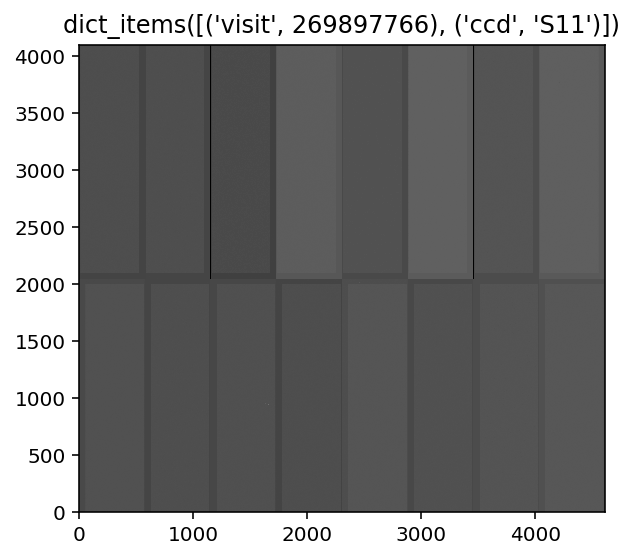

In [90]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')

disp.mtv(raw1, title=dataId1.items())

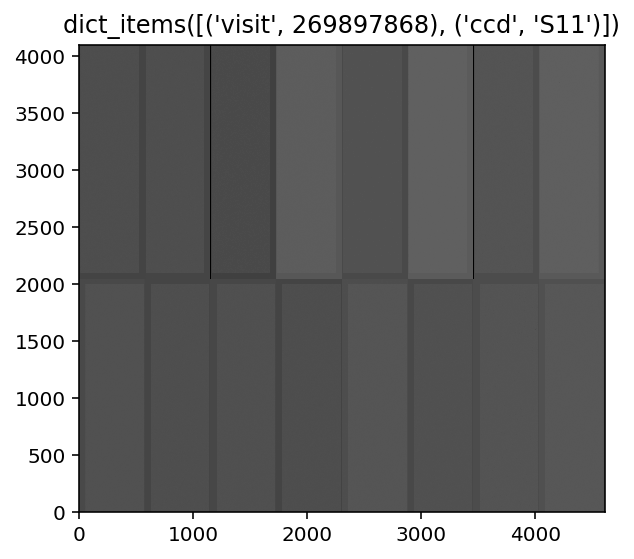

In [91]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')

disp.mtv(raw2, title=dataId2.items())

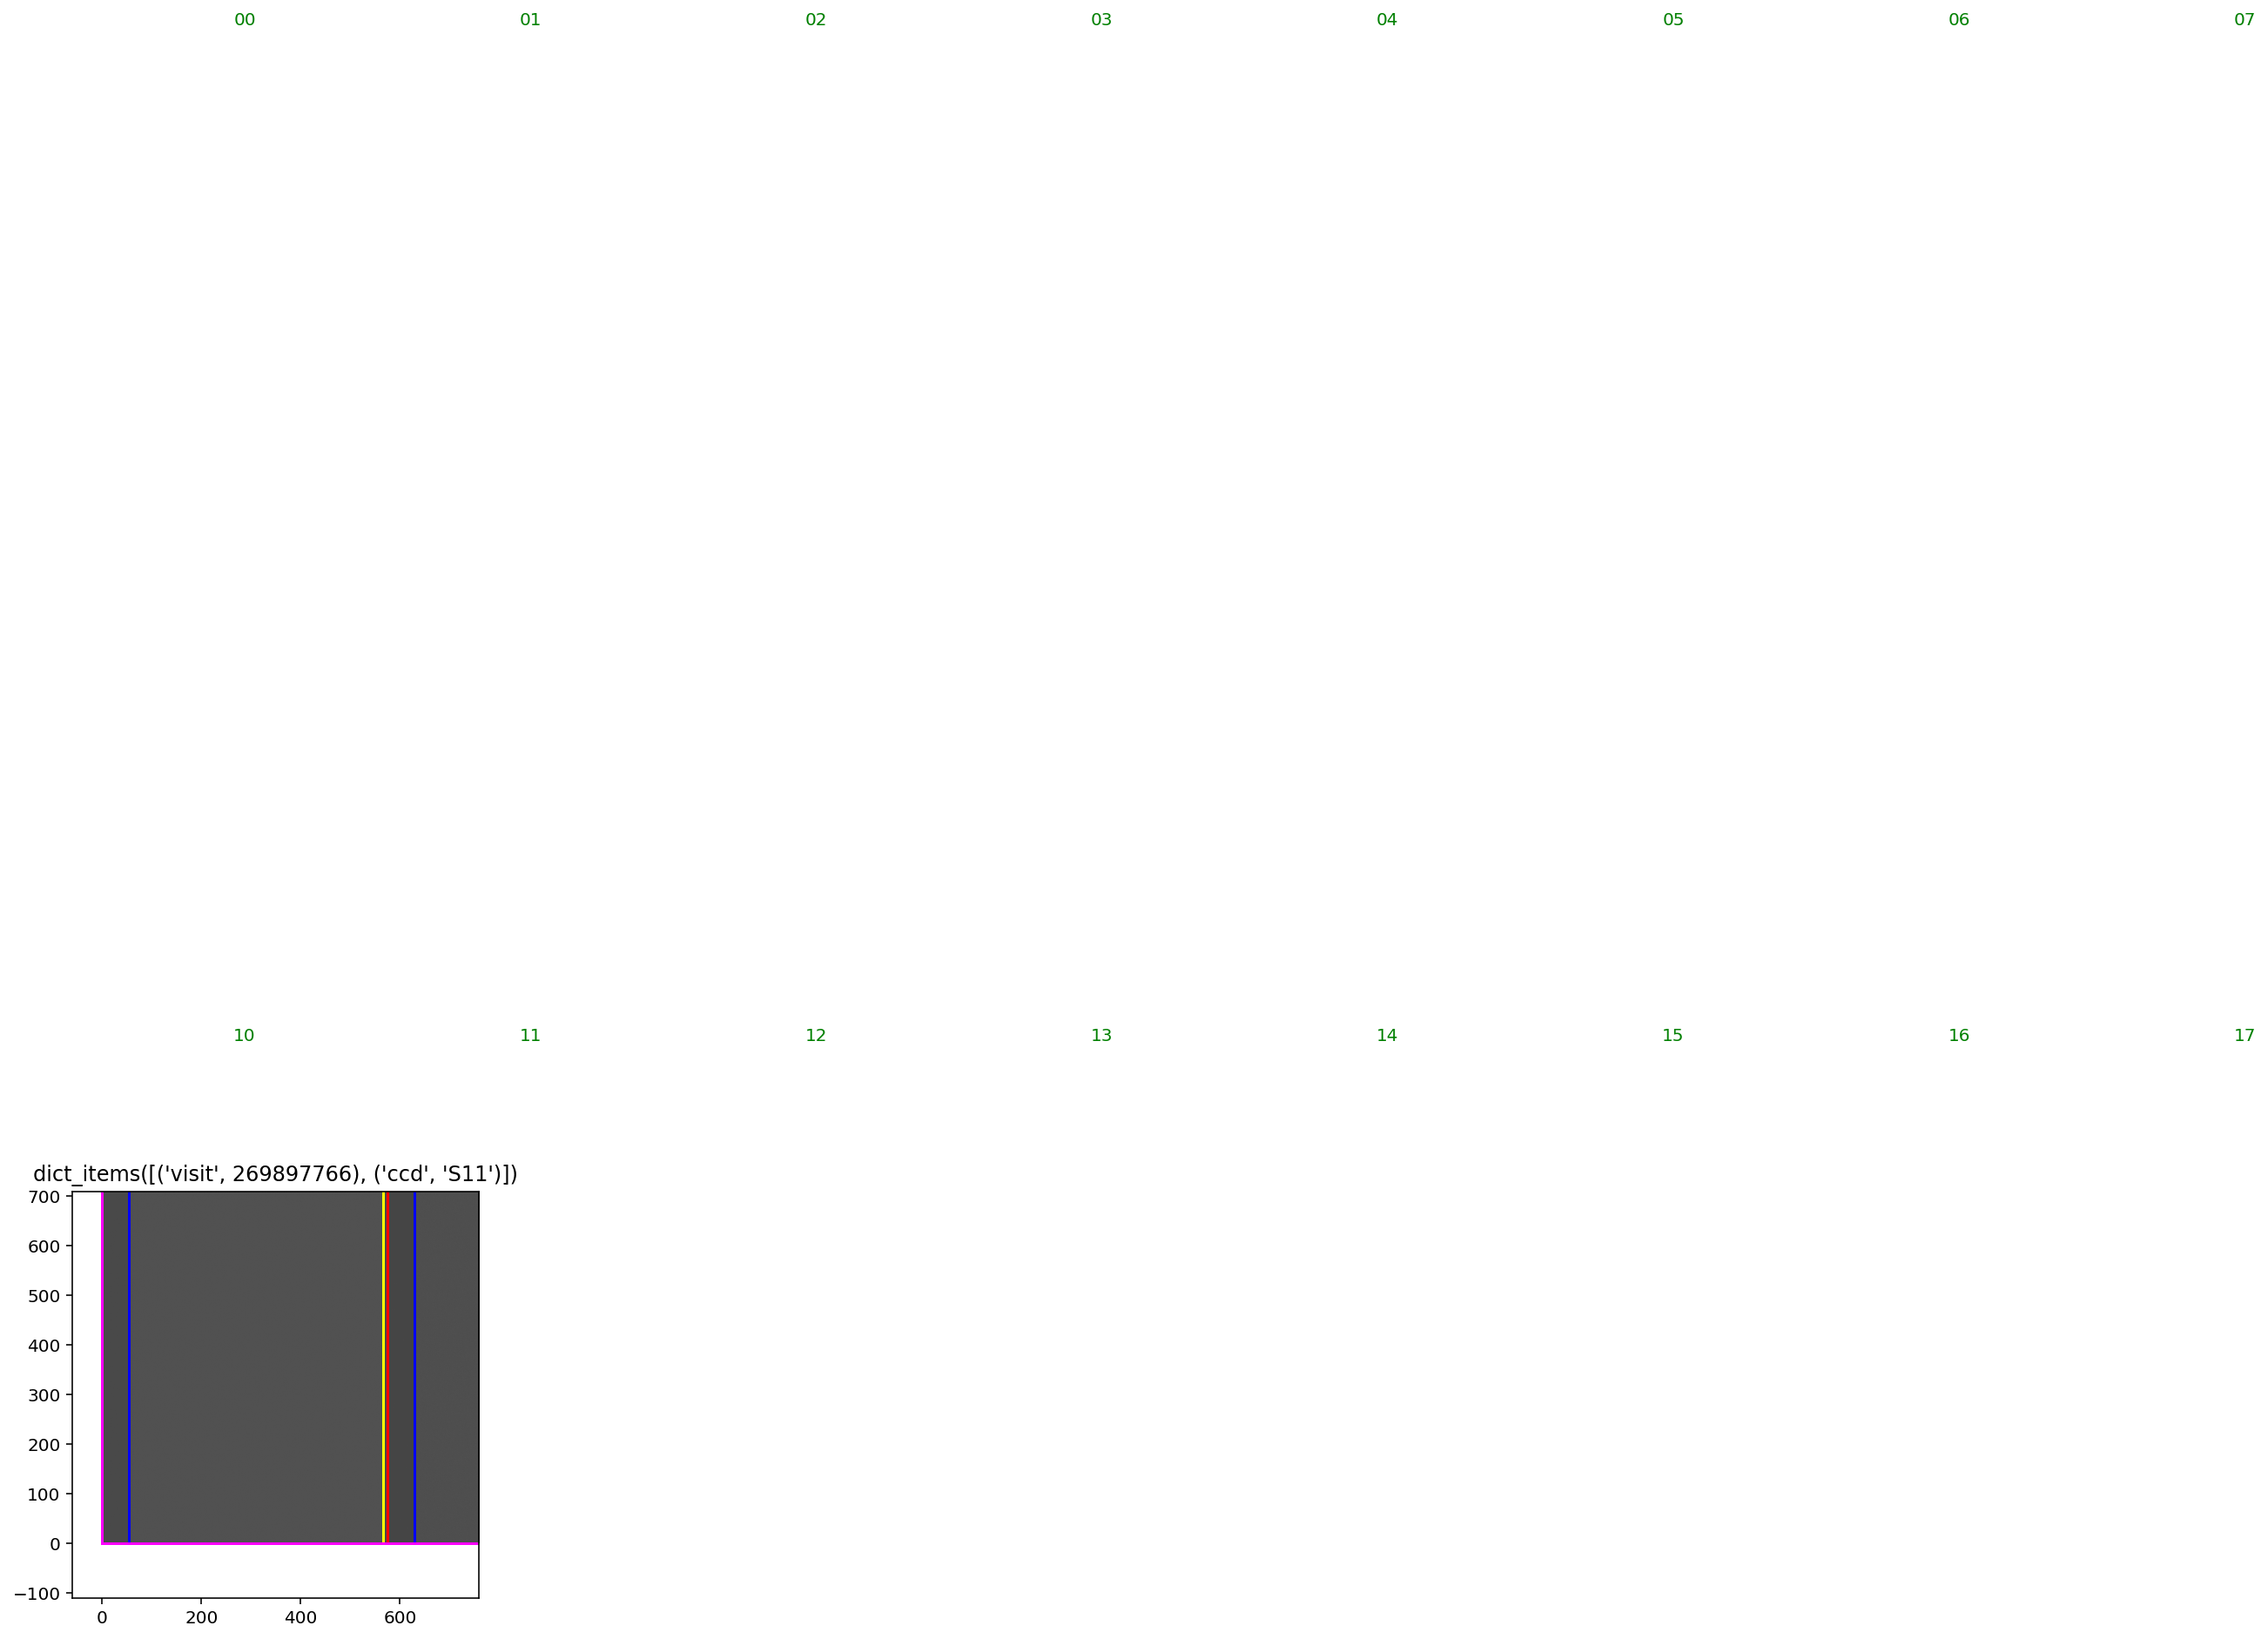

In [95]:
disp = afwDisplay.Display(1)    # you only need this in every cell because I'm using %matplotlib notebook. DM Bug??
disp.scale('asinh', 'zscale')

disp.mtv(raw1, title=dataId1.items())
cameraGeomUtils.overlayCcdBoxes(raw.getDetector(), display=disp)

try:
    disp.zoom(10, 350, 300)
except AttributeError as e:
    pass   # bug in display_matplotlib; doesn't work with `inline` in jupyter.  Ticket DM-13475; fixed 2018-02-02

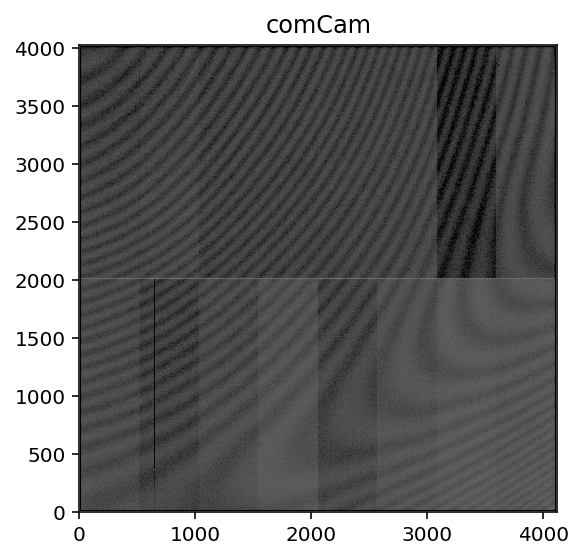

In [28]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')
camera = butler.get("camera")

cameraGeomUtils.showCamera(camera,
                           cameraGeomUtils.ButlerImage(butler, "raw", visit=dataId["visit"],
                                                       callback=cameraGeomUtils.rawCallback),
                                 binSize=1, detectorNameList=[dataId["ccd"]], overlay=False, display=disp);

In [ ]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')

dataType = "raw"
mos = cameraGeomUtils.showCamera(camera,
                                 cameraGeomUtils.ButlerImage(butler, dataType, visit=dataId["visit"],
                                                             callback=cameraGeomUtils.rawCallback),
                                 binSize=32, display=disp, title="%d %s" % (visit, dataType))

In [ ]:
def myCallback(im, ccd, imageSource, subtractMedian=True):
    """Assemble the CCD image, subtracting the overscan and subtracting each amp's median"""

    oim = cameraGeomUtils.rawCallback(im, ccd, imageSource,
                                       subtractBias=True, correctGain=False)
    if subtractMedian:
        for a in ccd:
            arr = oim[a.getBBox()].array
            arr -= np.median(arr)

    return oim

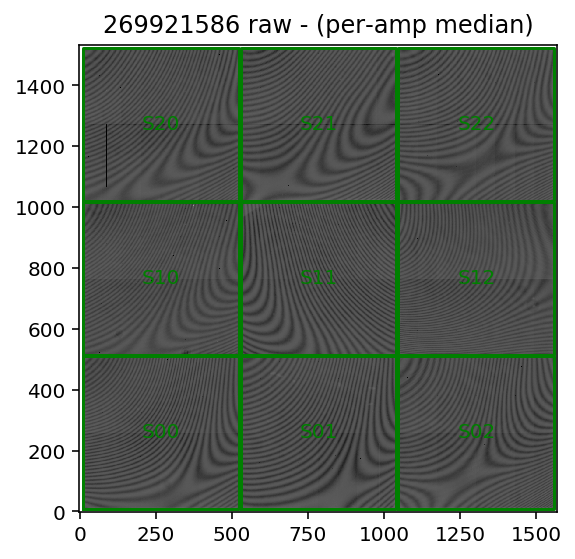

In [31]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')

dataType = "raw"
mos = cameraGeomUtils.showCamera(camera,
                                 cameraGeomUtils.ButlerImage(butler, dataType, visit=dataId["visit"],
                                                             callback=myCallback),
                                 binSize=8, display=disp, title="%d %s - (per-amp median)" % (visit, dataType))

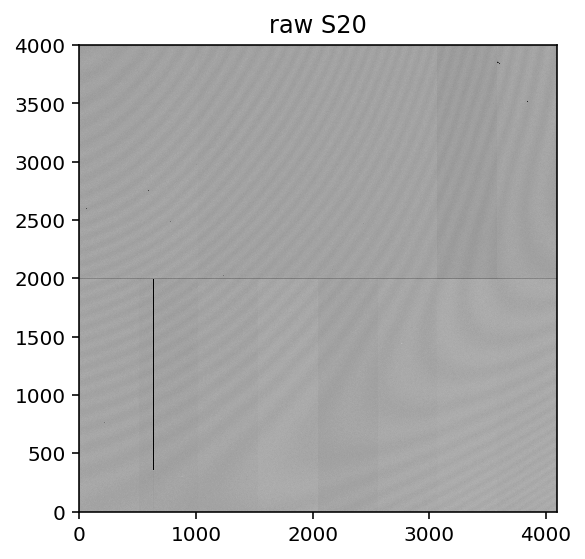

In [27]:
from lsst.ip.isr import AssembleCcdTask

config = AssembleCcdTask.ConfigClass()          # Configuration options
config.doTrim = True

assembleTask = AssembleCcdTask(config=config)   # Build the object that'll do the work -- basically a functor

raw = butler.get('raw', visit=visit, ccd='S20')
exposure = assembleTask.assembleCcd(raw)        # Do the work.

disp = afwDisplay.Display(2)

disp.mtv(exposure, title="raw S20")

In [44]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')

dataType = ["bias", "dark", "flat"][0]

mos = cameraGeomUtils.showCamera(camera,
                                 cameraGeomUtils.ButlerImage(butler, dataType, visit=dataId["visit"]),
                                 binSize=32, display=disp, overlay=False, title="%d %s" % (visit, dataType))

UnboundLocalError: local variable 'allowRotate' referenced before assignment

In [25]:
from lsst.ip.isr import IsrTask

config = IsrTask.ConfigClass()
config.doBias = False
config.doDark = False
config.doFringe = False
config.doLinearize = False
config.doDefect = False

isrTask = IsrTask(config=config)

def isrCallback(im, ccd, imageSource, isrTask=isrTask):
    """Run the ISR"""
    dataId = imageSource.kwargs.copy()    # this is the ugly bit
    dataId['ccd'] = ccd.getName()

    if True:   # Avoid re-reading the data by reconstructing the Exposure; this is an ugly bit too
        import lsst.afw.image as afwImage

        raw = afwImage.makeExposure(afwImage.makeMaskedImage(im))
        raw.setDetector(ccd)
        raw.getInfo().setVisitInfo(afwImage.VisitInfo(exposureTime=1.0))
    else:
        raw = butler.get('raw', dataId)

    flat = butler.get('flat', dataId)

    result = isrTask.run(raw, flat=flat)    # Returns a struct;  result.exposure is an Exposure

    return result.exposure.image

In [26]:
disp = afwDisplay.Display(1)
disp.scale('asinh', 'zscale')

mos = cameraGeomUtils.showCamera(camera, 
                                 cameraGeomUtils.ButlerImage(butler, "raw", visit=visit,
                                                             callback=isrCallback), 
                                 binSize=4,
                                 display=disp, title="Post-ISR")

AssertionError: minimum and maximum values must not be equal